In [218]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,confusion_matrix,accuracy_score
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler

In [219]:
data=pd.read_csv('F:/3. Multi Linear Regression/50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [220]:
data.shape

(50, 5)

In [221]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [222]:
data[data.duplicated()]

,R&D Spend,Administration,Marketing Spend,State,Profit


In [223]:
data.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [224]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [225]:
corr=data.corr()
corr

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<AxesSubplot:>

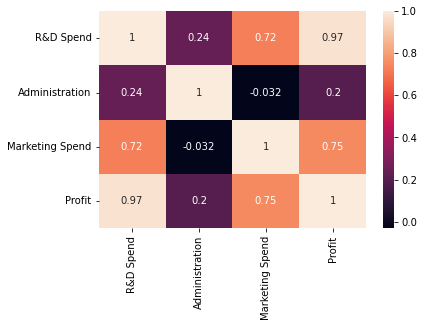

In [226]:
sns.heatmap(corr,annot=True)

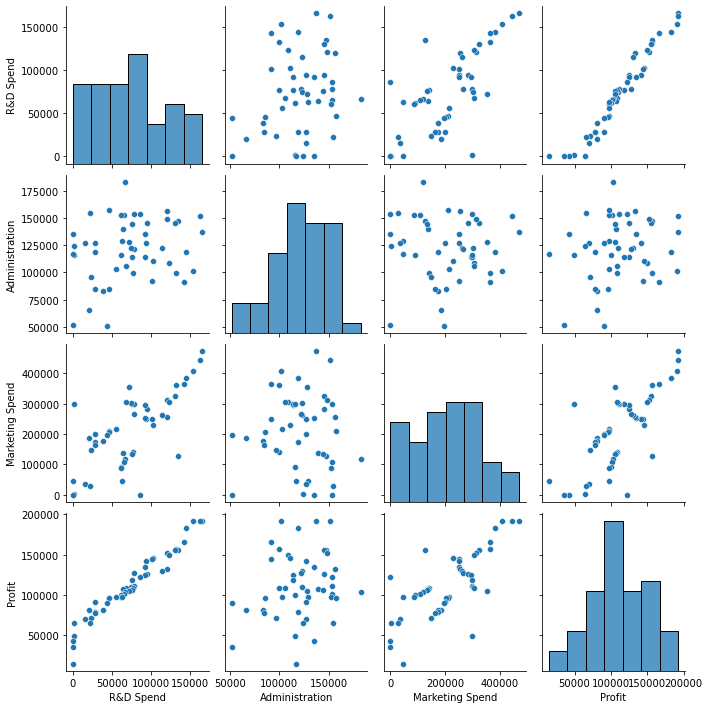

In [227]:
sns.pairplot(data)

<AxesSubplot:xlabel='Administration', ylabel='Profit'>

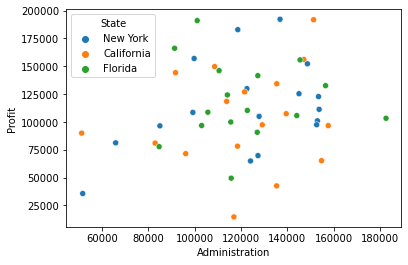

In [228]:
sns.scatterplot(x='Administration',y='Profit',hue='State',color='red',data=data)

<AxesSubplot:xlabel='R&D Spend', ylabel='Profit'>

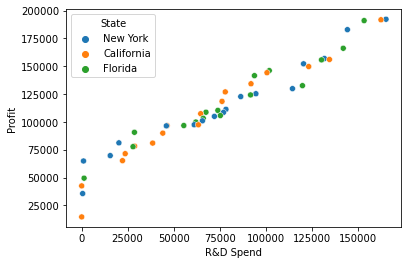

In [229]:
sns.scatterplot(x='R&D Spend',y='Profit',hue='State',color='red',data=data)

<AxesSubplot:xlabel='State', ylabel='Profit'>

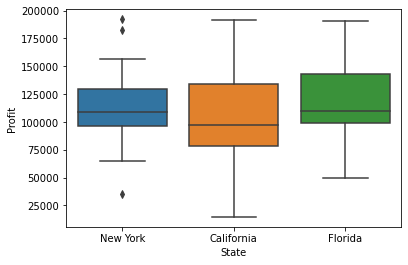

In [232]:
sns.boxplot(x='State',y='Profit',data=data)

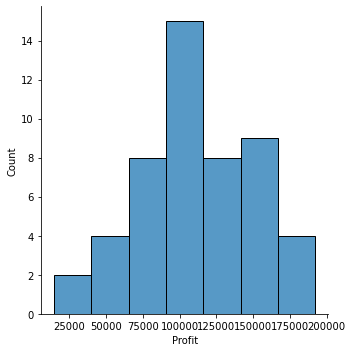

In [233]:
sns.displot(data['Profit'])

F:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='State', ylabel='Profit'>

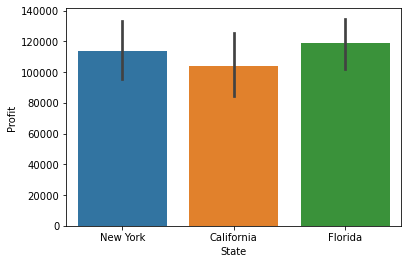

In [234]:
sns.barplot('State','Profit',data=data)

In [235]:
data=data.drop('Administration',axis=1)
data.head()

,R&D Spend,Marketing Spend,State,Profit
0,165349.20,471784.10,New York,192261.83
1,162597.70,443898.53,California,191792.06
2,153441.51,407934.54,Florida,191050.39
3,144372.41,383199.62,New York,182901.99
4,142107.34,366168.42,Florida,166187.94


In [236]:
data.corr()

,R&D Spend,Marketing Spend,Profit
R&D Spend,1.000000,0.724248,0.972900
Marketing Spend,0.724248,1.000000,0.747766
Profit,0.972900,0.747766,1.000000


In [237]:
dummies=pd.get_dummies(data['State'],drop_first=True)
dummies


,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0
5,0,1
6,0,0
7,1,0
8,0,1
9,0,0


In [238]:
data_new=pd.concat([data,dummies],axis=1)
data_new

,R&D Spend,Marketing Spend,State,Profit,Florida,New York
0,165349.20,471784.10,New York,192261.83,0,1
1,162597.70,443898.53,California,191792.06,0,0
2,153441.51,407934.54,Florida,191050.39,1,0
3,144372.41,383199.62,New York,182901.99,0,1
4,142107.34,366168.42,Florida,166187.94,1,0
5,131876.90,362861.36,New York,156991.12,0,1
6,134615.46,127716.82,California,156122.51,0,0
7,130298.13,323876.68,Florida,155752.60,1,0
8,120542.52,311613.29,New York,152211.77,0,1
9,123334.88,304981.62,California,149759.96,0,0


In [239]:
data_new=data_new.drop('State',axis=1)
data_new

,R&D Spend,Marketing Spend,Profit,Florida,New York
0,165349.20,471784.10,192261.83,0,1
1,162597.70,443898.53,191792.06,0,0
2,153441.51,407934.54,191050.39,1,0
3,144372.41,383199.62,182901.99,0,1
4,142107.34,366168.42,166187.94,1,0
5,131876.90,362861.36,156991.12,0,1
6,134615.46,127716.82,156122.51,0,0
7,130298.13,323876.68,155752.60,1,0
8,120542.52,311613.29,152211.77,0,1
9,123334.88,304981.62,149759.96,0,0


In [240]:
train,test=train_test_split(data_new)
train.shape,test.shape

((37, 5), (13, 5))

In [241]:
x_train=train.drop(['Profit'],axis=1)
x_train.shape

(37, 4)

In [242]:
y_train=train['Profit']
y_train.shape

(37,)

In [243]:
x_test=test.drop(['Profit'],axis=1)
x_test.shape

(13, 4)

In [244]:
y_test=test['Profit']
y_test.shape

(13,)

In [245]:
model=LinearRegression()
model

LinearRegression()

In [246]:
model_fitting=model.fit(x_train,y_train)

In [247]:
model_fitting.score(x_train,y_train)

0.9396793431613475

In [248]:
pred=model_fitting.predict(x_test)
pred

array([189610.00185538,  96563.35708188, 100800.76385175, 100978.35070113,
       102326.49426295,  63424.53384331,  87136.56462077, 182068.9924025 ,
       110741.3372019 ,  58556.79479155,  89517.9969607 ,  46086.07655297,
       162670.85544698])

In [249]:
r2_score(y_test,pred)

0.9723402710664026

In [250]:
df=pd.DataFrame({'Actual':y_test,'Predicted':pred,'Error':(y_test-pred)})
df

,Actual,Predicted,Error
1,191792.06,189610.001855,2182.058145
31,97483.56,96563.357082,920.202918
29,101004.64,100800.763852,203.876148
25,107404.34,100978.350701,6425.989299
28,103282.38,102326.494263,955.885737
44,65200.33,63424.533843,1775.796157
37,89949.14,87136.564621,2812.575379
2,191050.39,182068.992403,8981.397597
23,108733.99,110741.337202,-2007.347202
46,49490.75,58556.794792,-9066.044792
